In [1]:
import tensorflow as tf
from res.plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [2]:
set_default()

In [3]:
n_points = 1000
X = tf.random.normal(shape = (n_points, 2))
colors = X[:, 0]

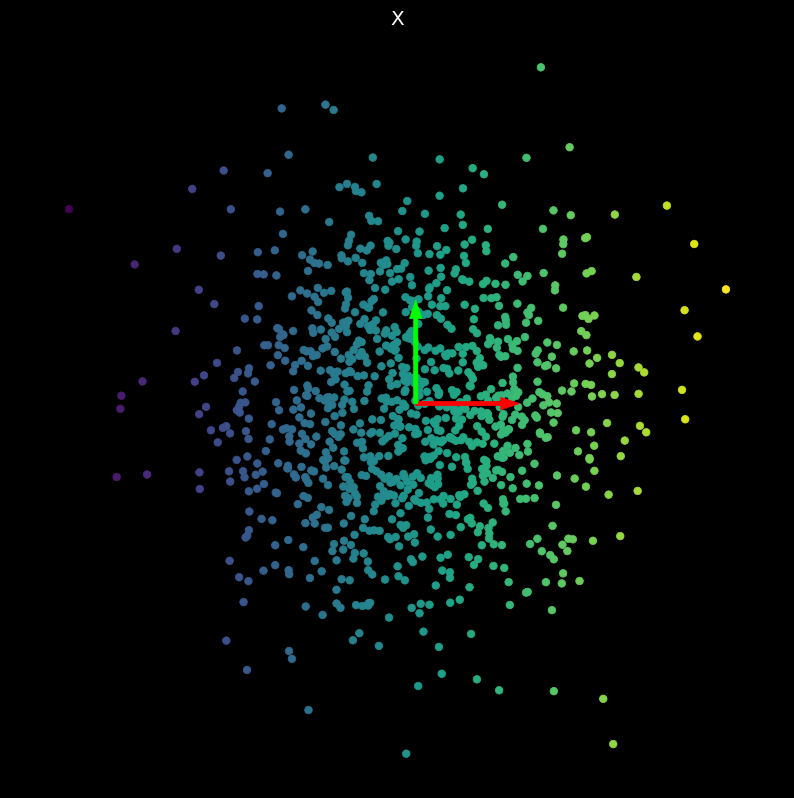

In [6]:
show_scatterplot(X, colors, title='X')

OI = tf.concat([tf.zeros((2,2)), tf.eye(2)], axis=0)
plot_bases(OI)

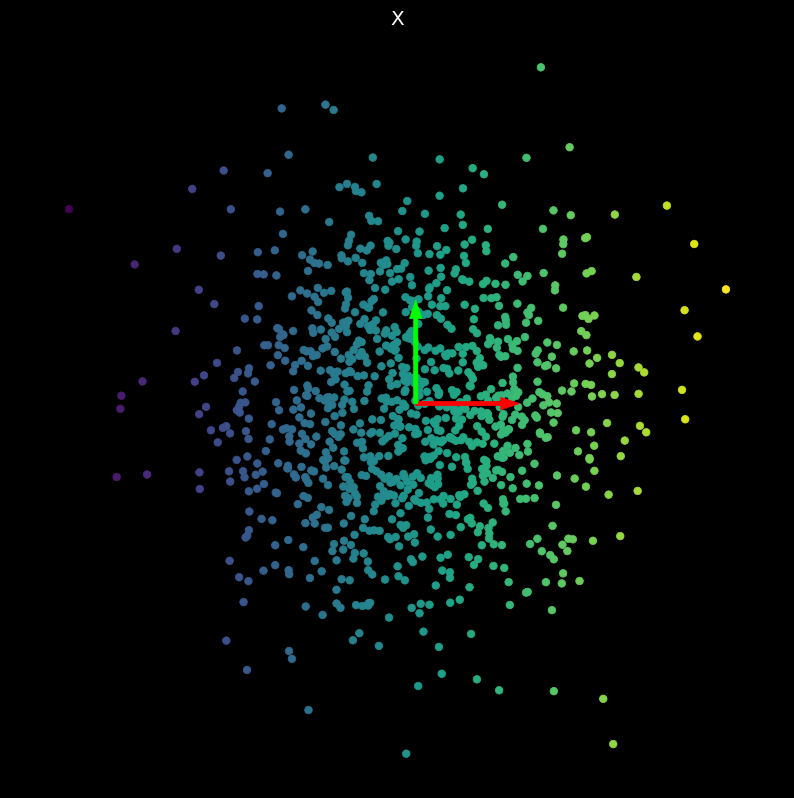

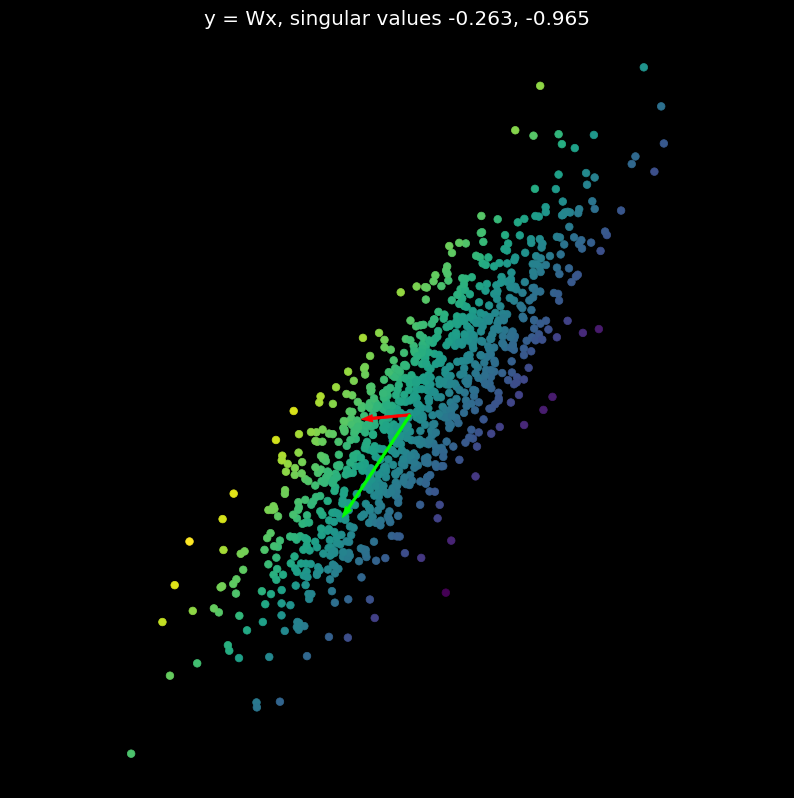

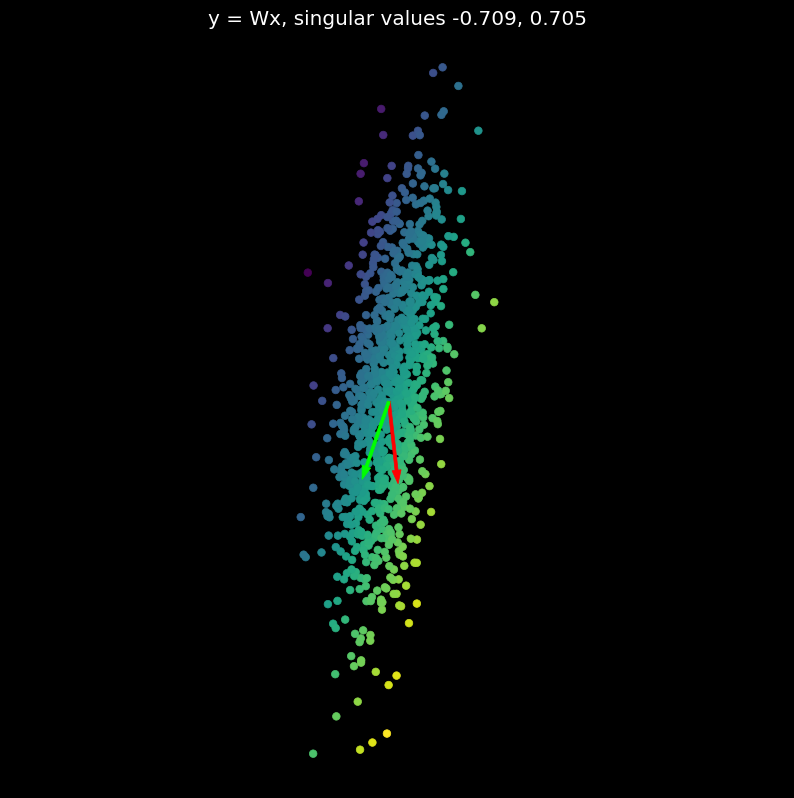

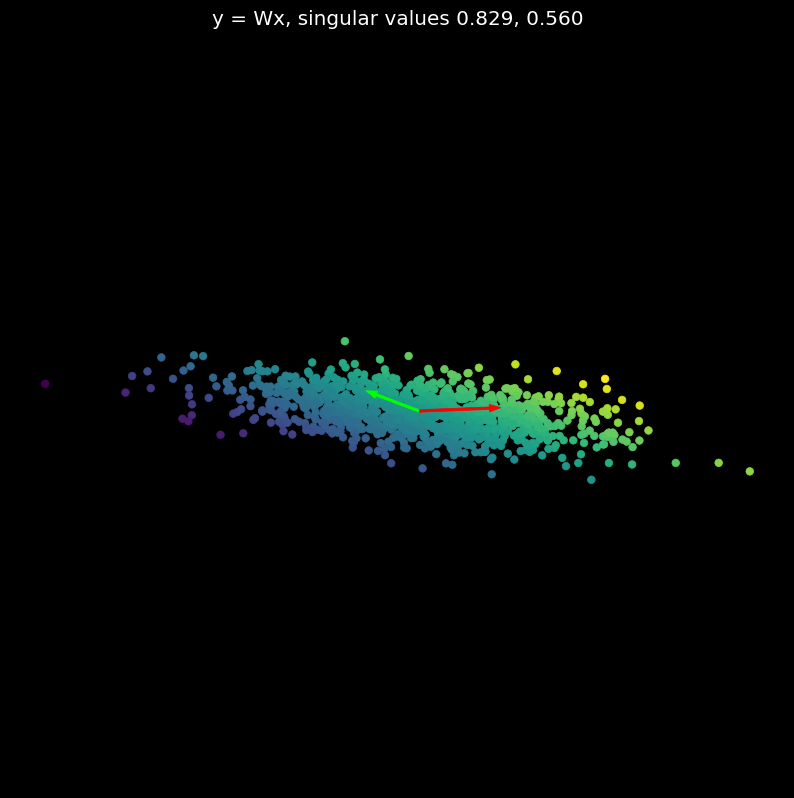

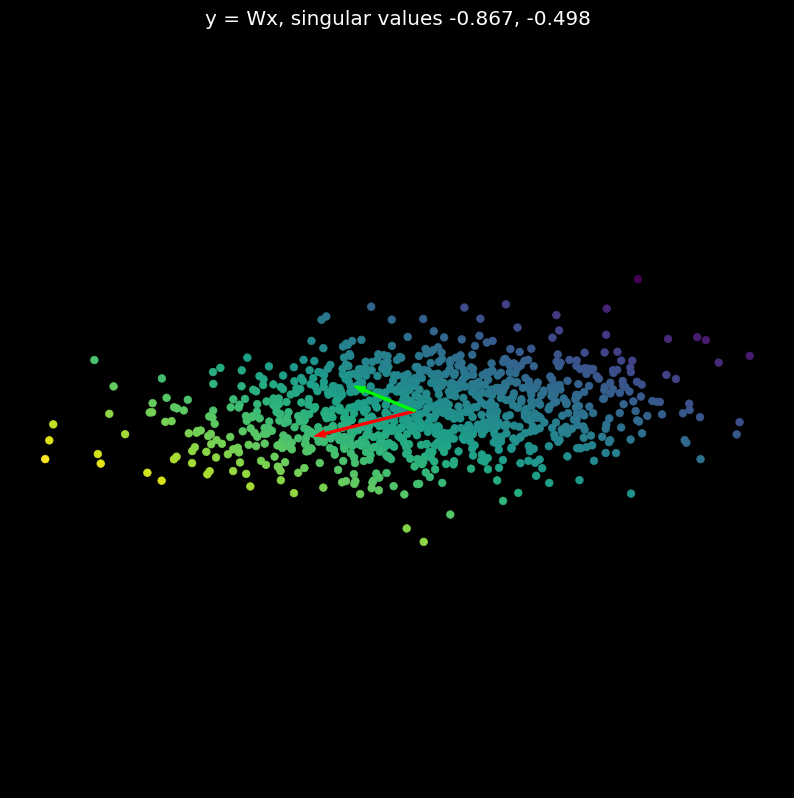

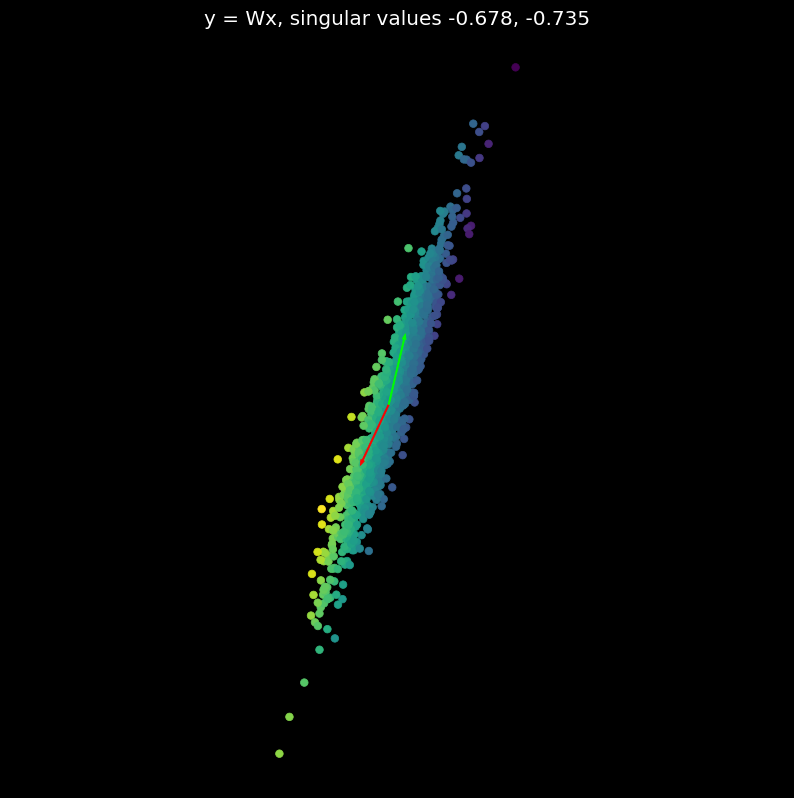

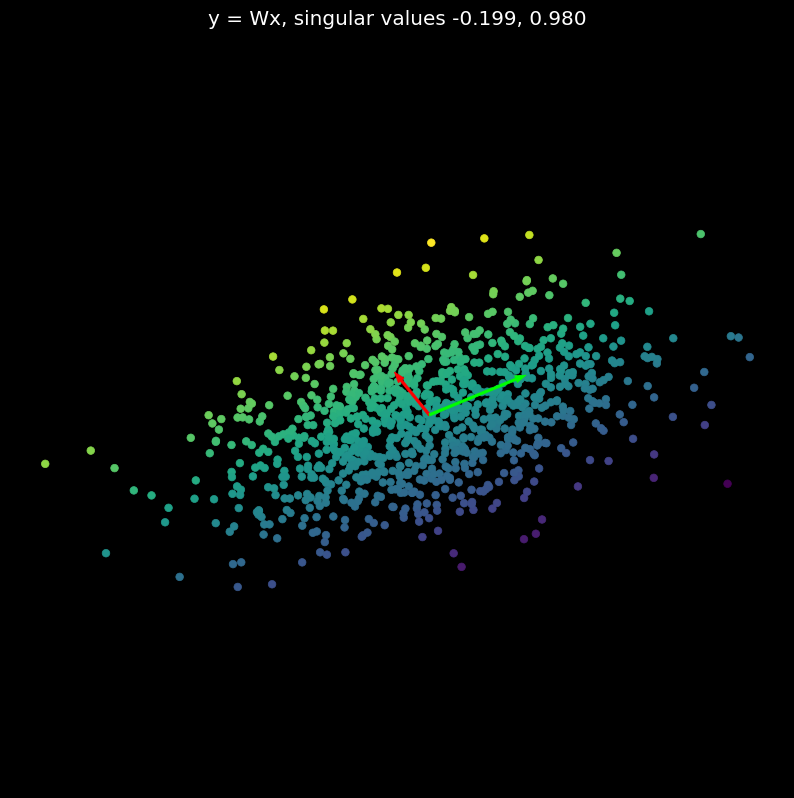

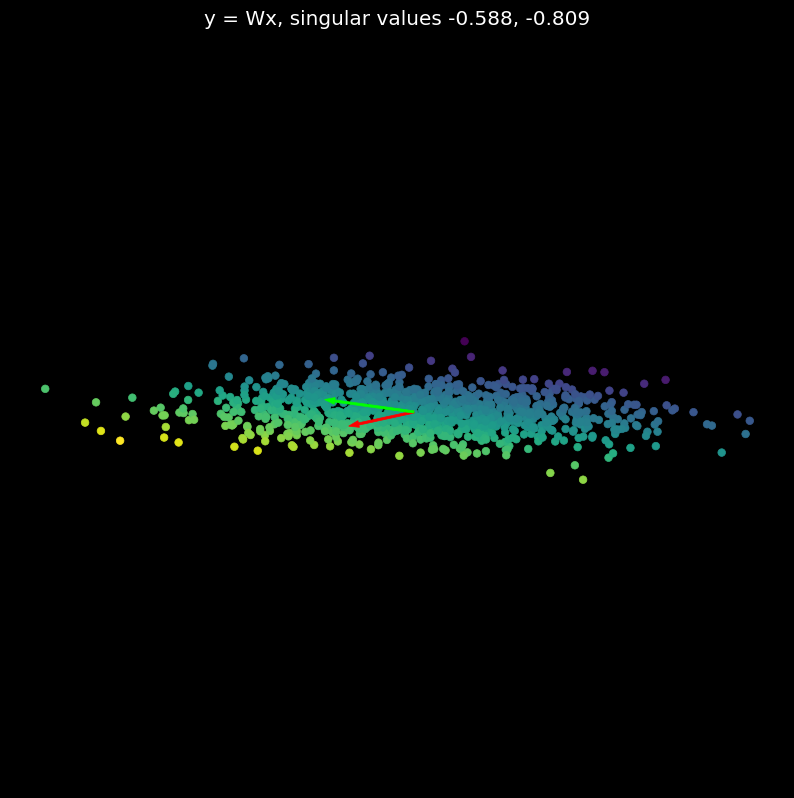

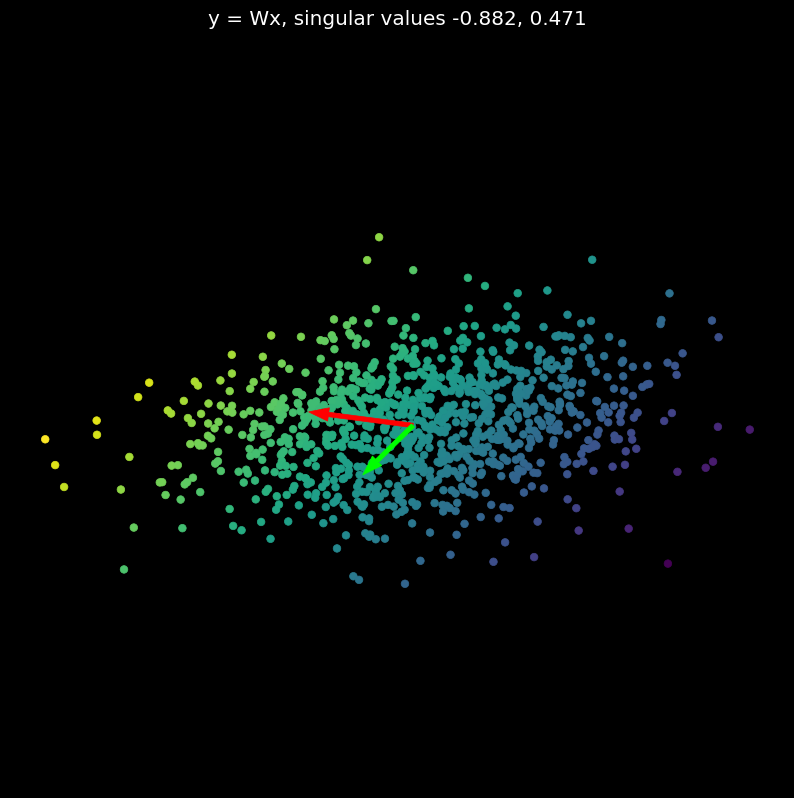

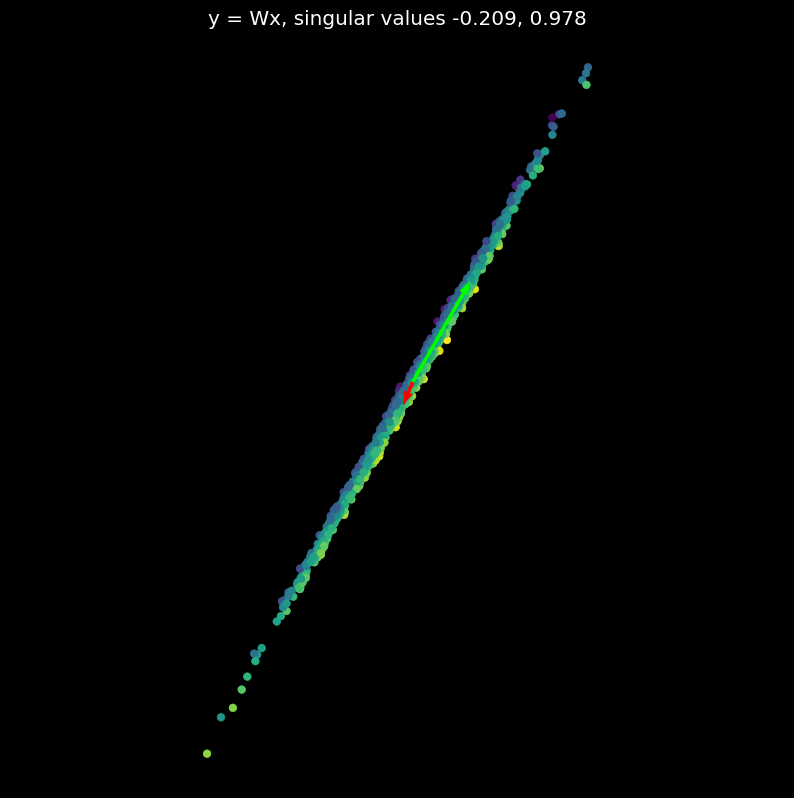

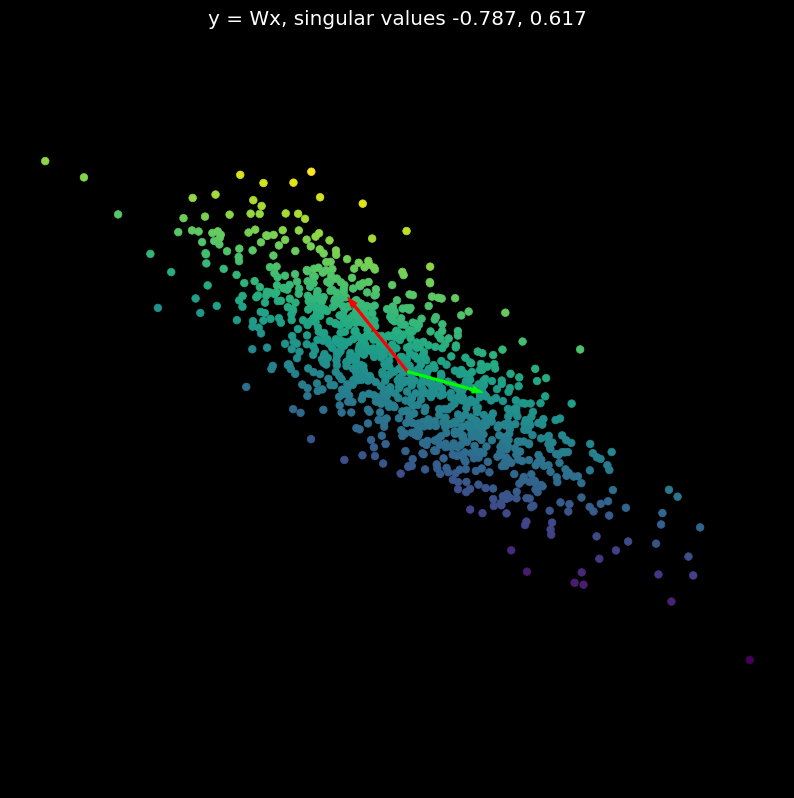

In [21]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

for i in range(10):
    W = tf.random.normal(shape=(2,2))
    Y = X @ W
    U, S, V, = tf.linalg.svd(W)
    show_scatterplot(Y, colors, title = f'y = Wx, singular values {S[0][0].numpy():.3f}, '
                     f'{S[0][1].numpy():.3f}')
    new_OI = OI @ W
    plot_bases(new_OI)

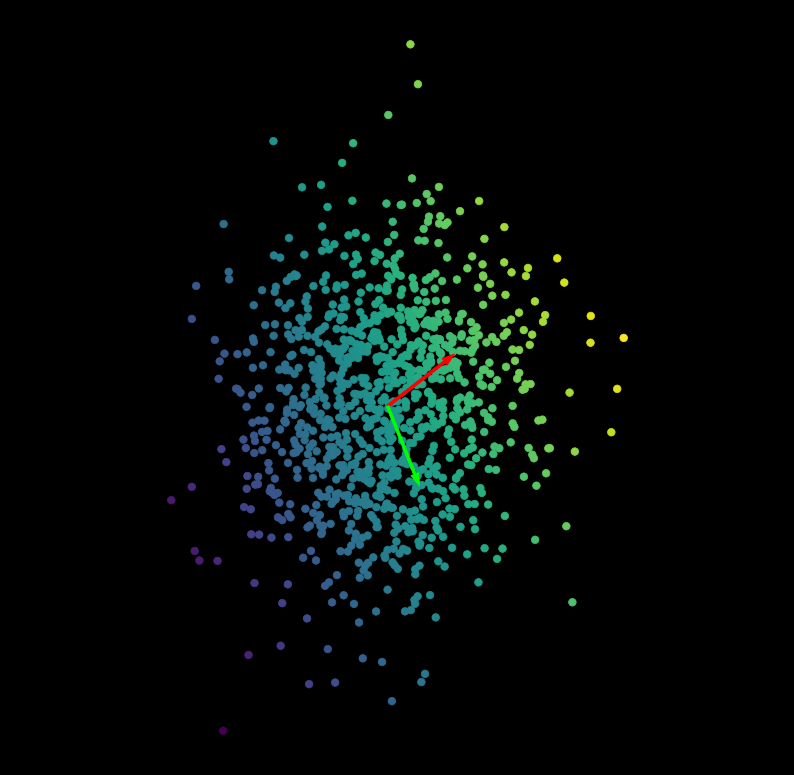

In [20]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (2,)),
    tf.keras.layers.Dense(2, use_bias = False)
])

Y = model(X)
show_scatterplot(Y, colors)
plot_bases(model(OI))

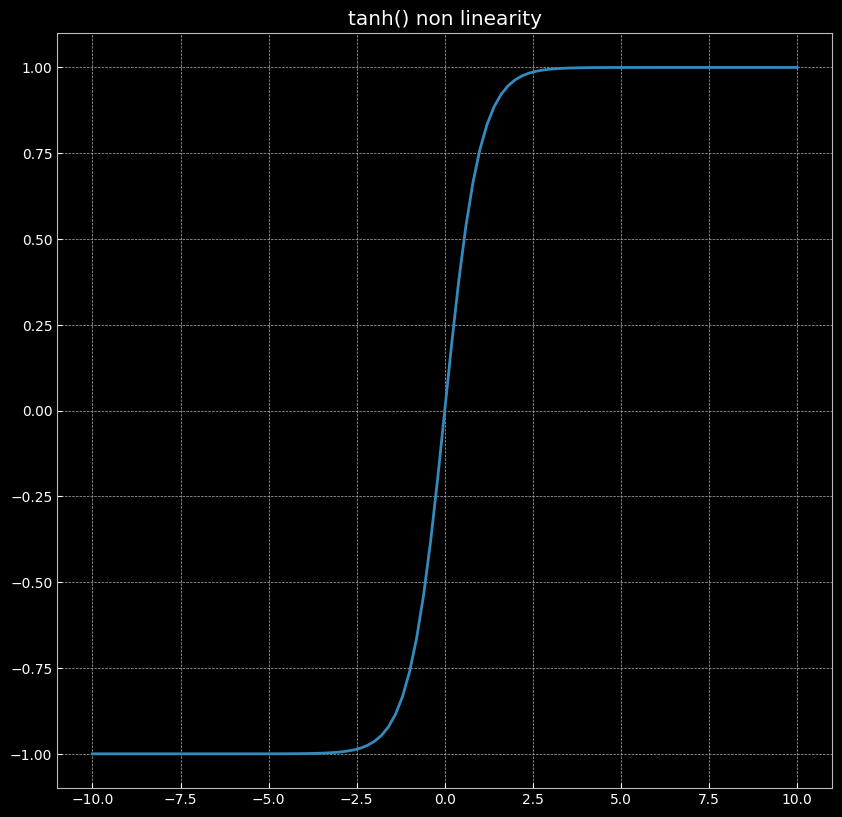

In [22]:
z = tf.linspace(-10, 10, 101)
s = tf.math.tanh(z)
plot(z.numpy(), s.numpy())
title('tanh() non linearity');

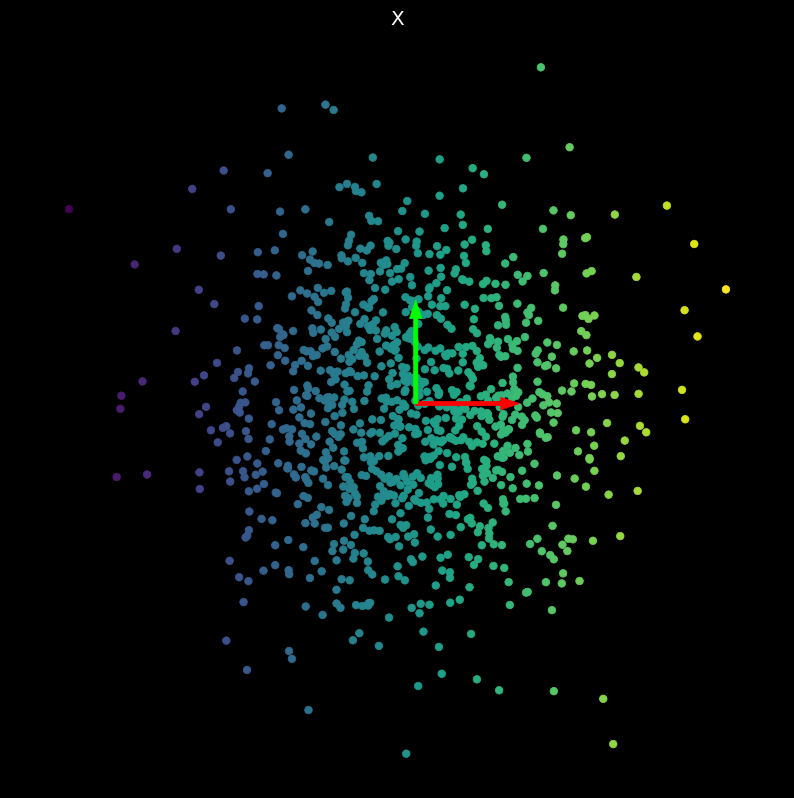

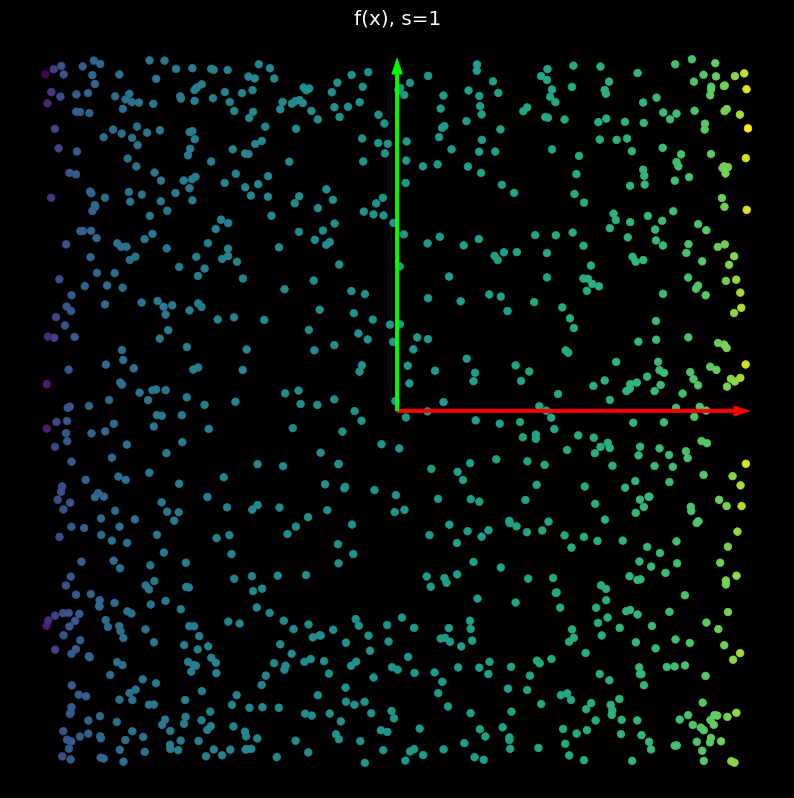

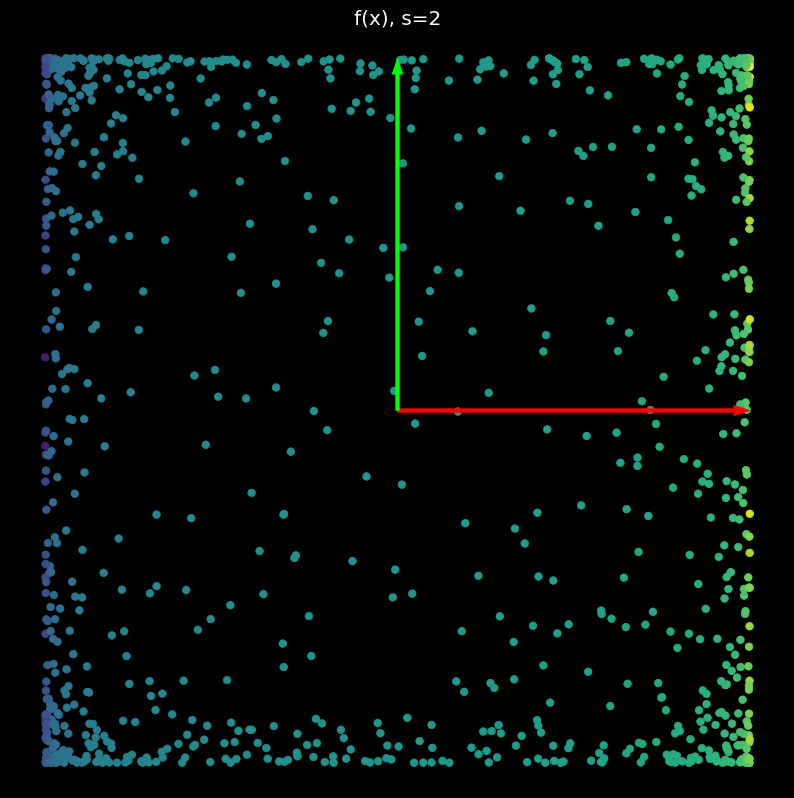

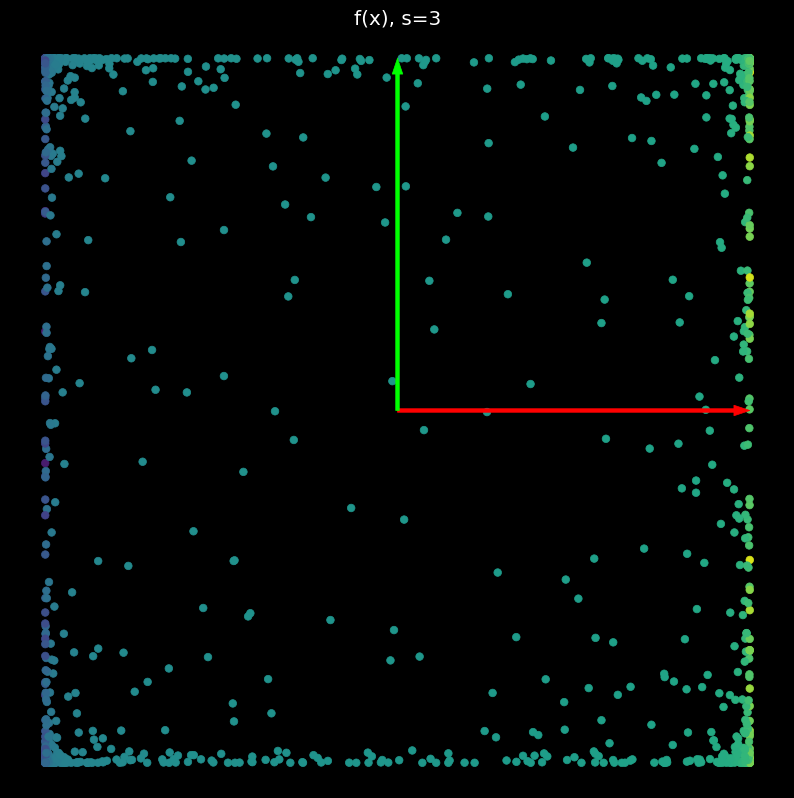

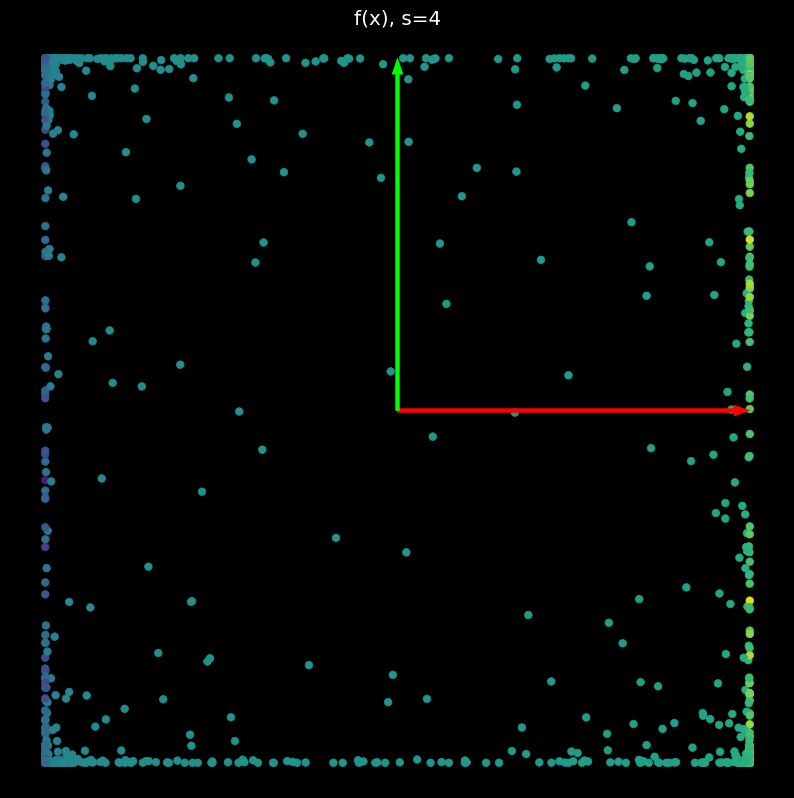

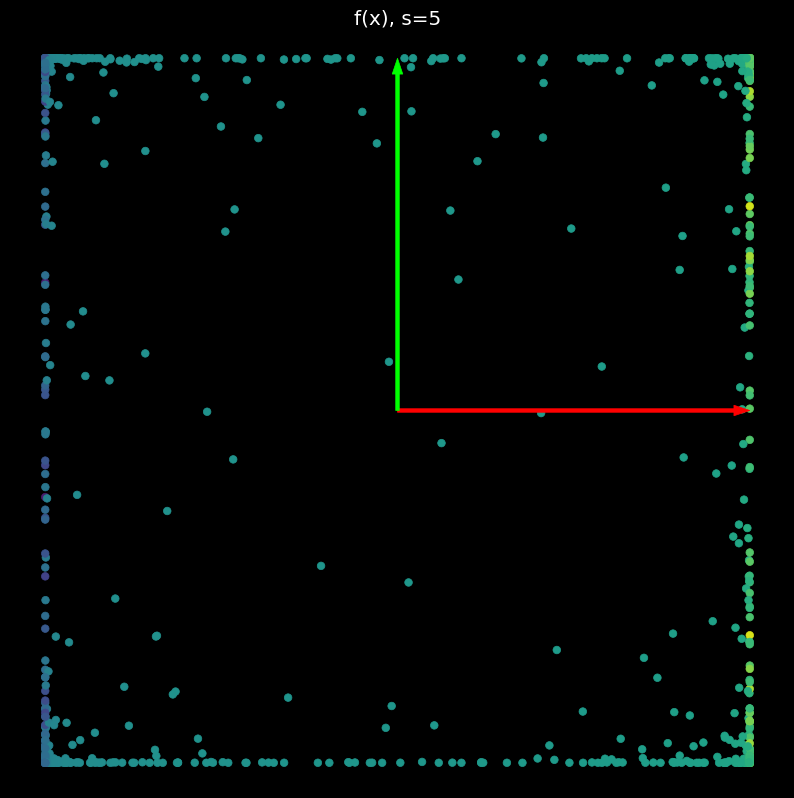

In [30]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = tf.keras.Sequential([
    tf.keras.Input(shape = (2,)),
    tf.keras.layers.Dense(2, use_bias = False),
    tf.keras.layers.Activation(tf.nn.tanh),
])

for s in range(1, 6):
    W = s * tf.eye(2)
    model.layers[0].set_weights([W])
    Y = model(X)
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

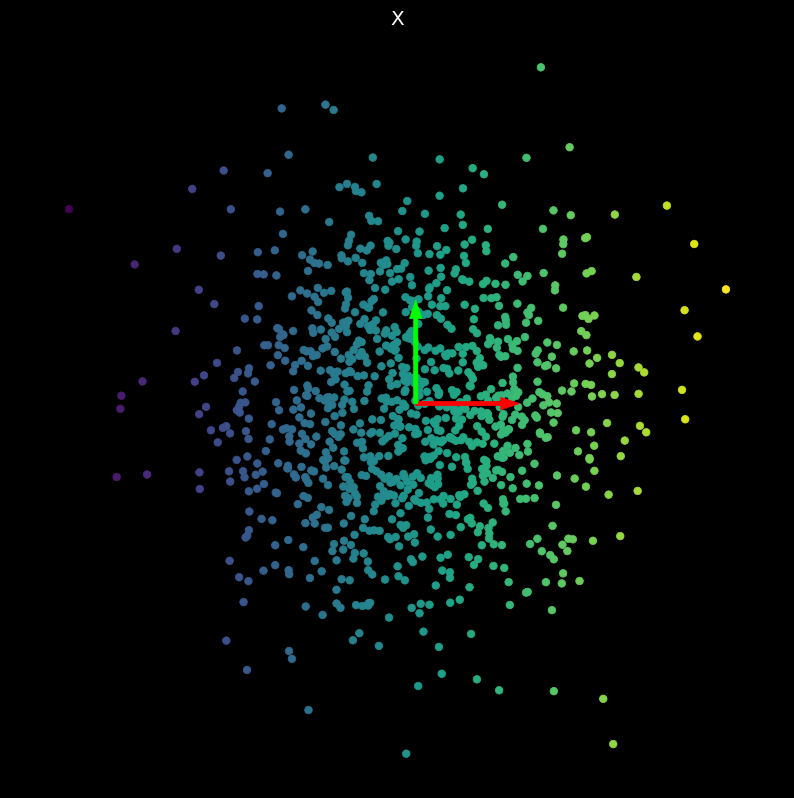

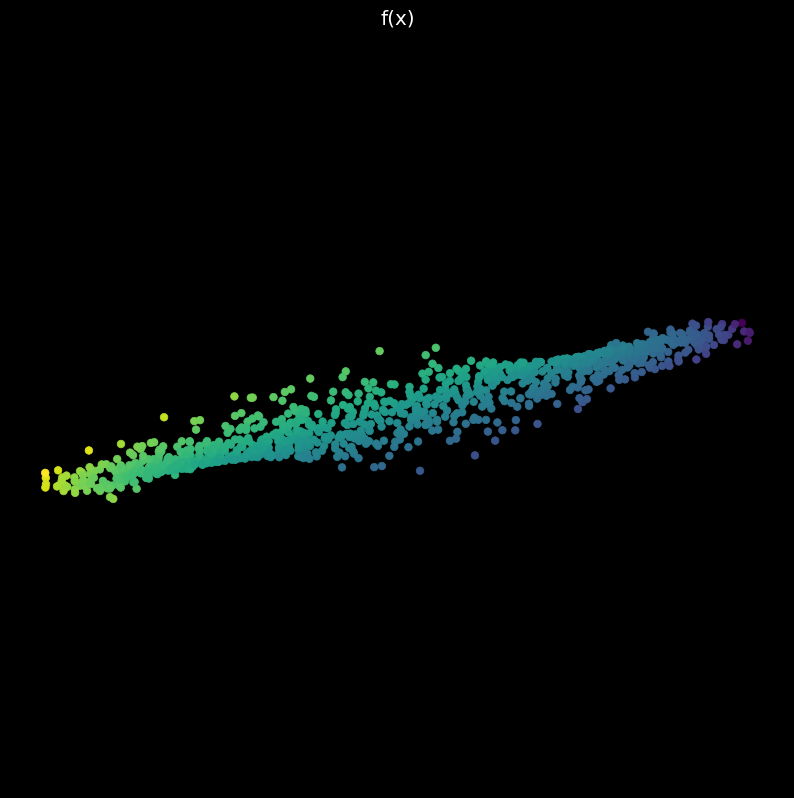

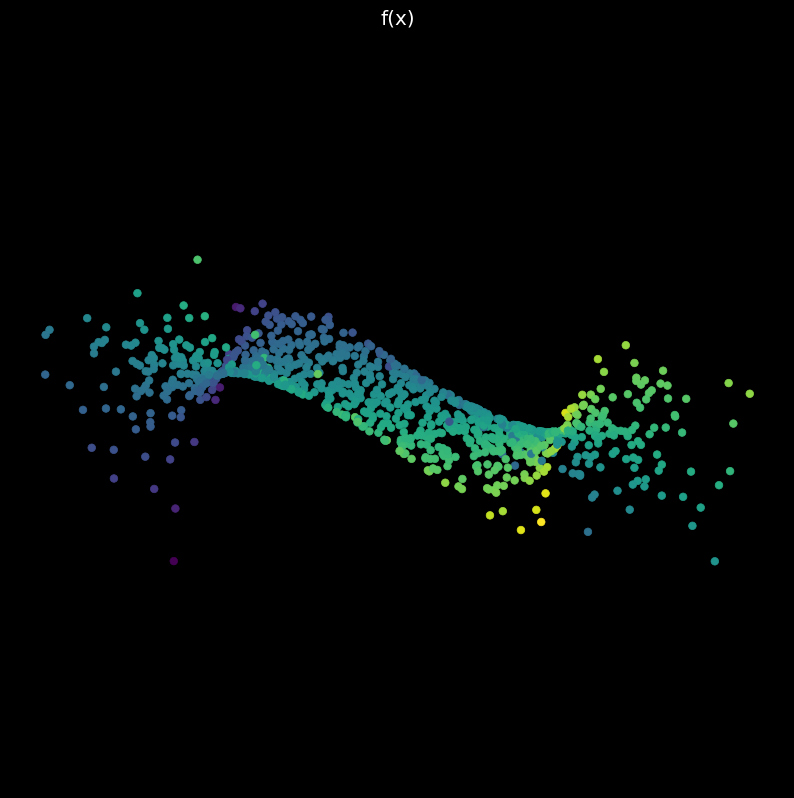

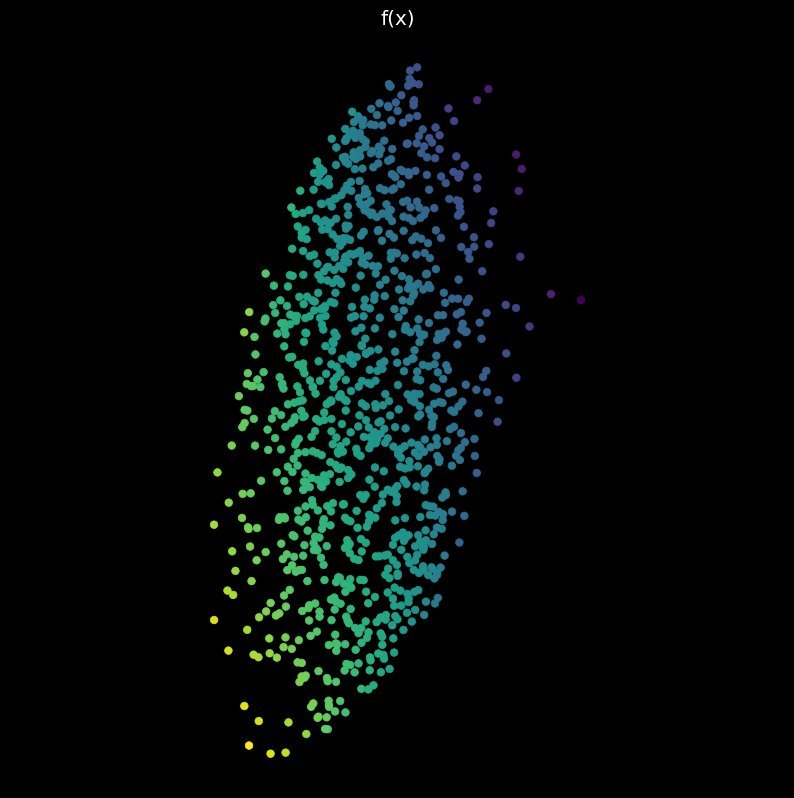

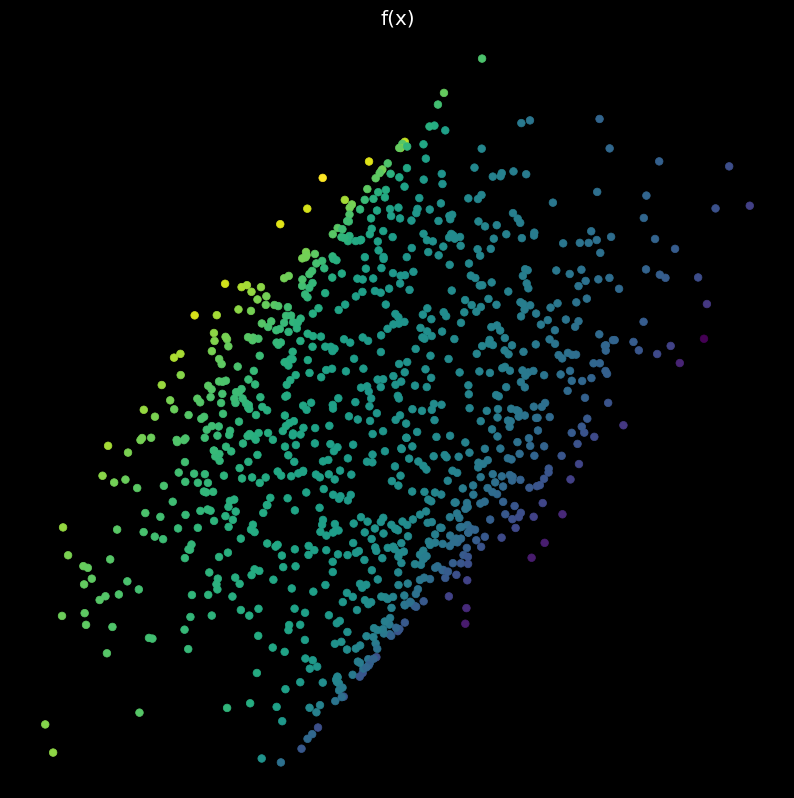

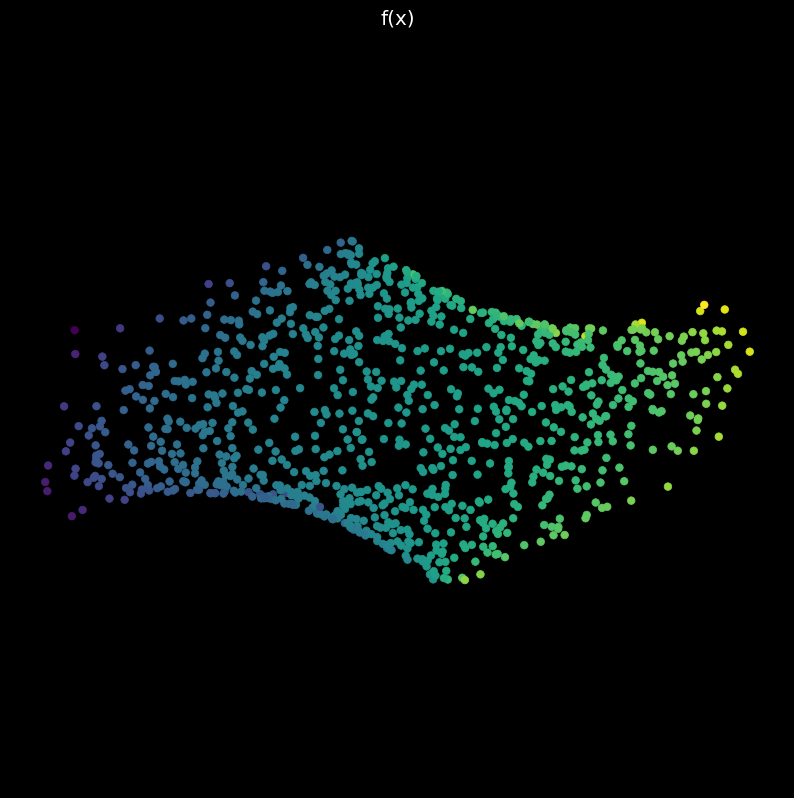

In [34]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)
n_hidden = 5

for i in range(5):
    # create 1-layer neural networks with random weights
    model = tf.keras.Sequential([
        tf.keras.Input(shape = (2,)),
        tf.keras.layers.Dense(n_hidden, use_bias = False),
        tf.keras.layers.Activation(tf.nn.tanh),
        tf.keras.layers.Dense(units = 2, use_bias = False)
    ])

    Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')
#     plot_bases(OI)

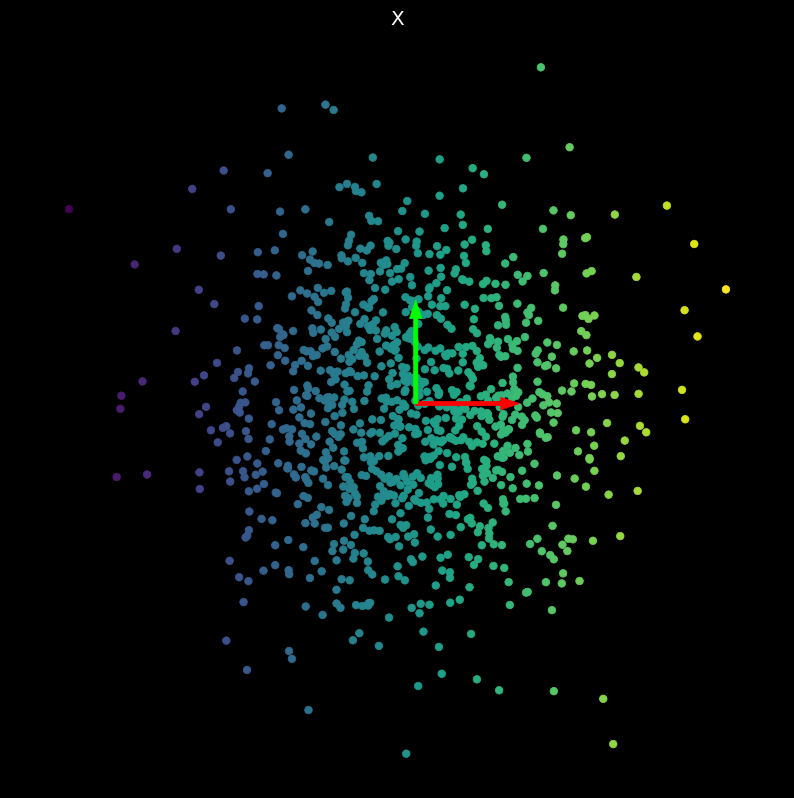

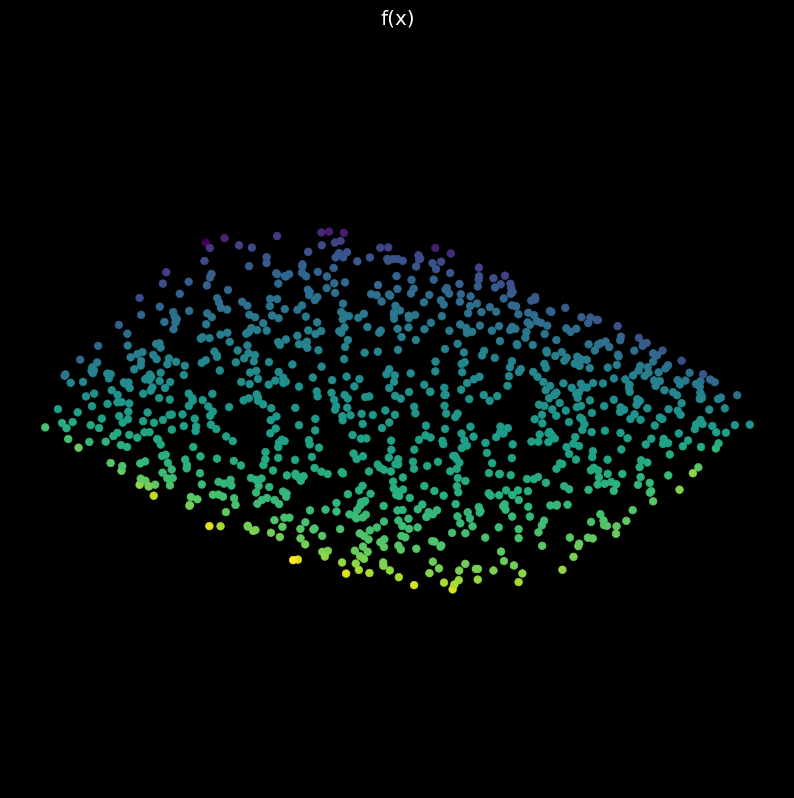

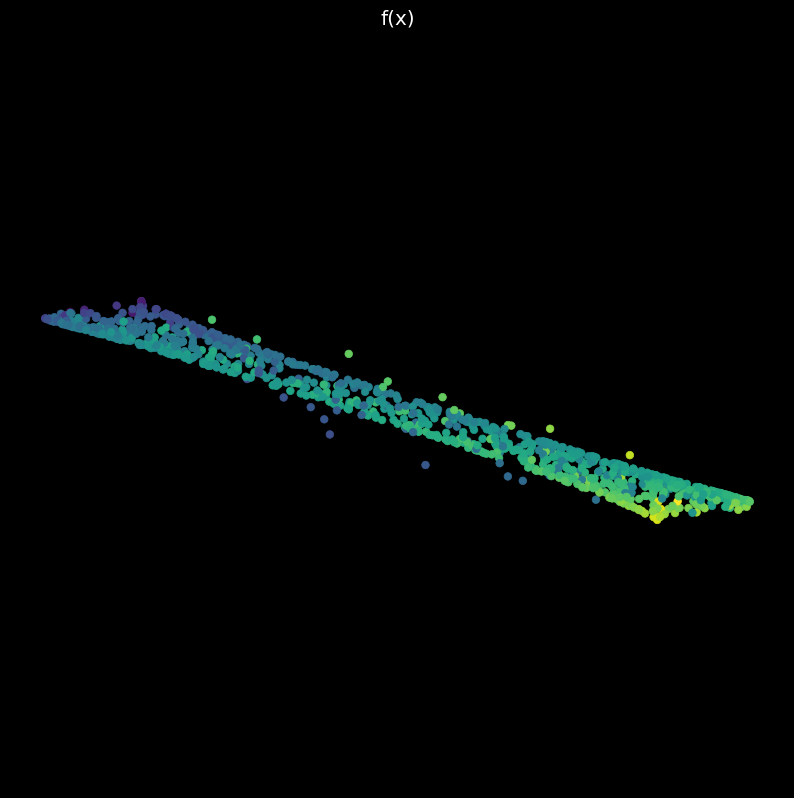

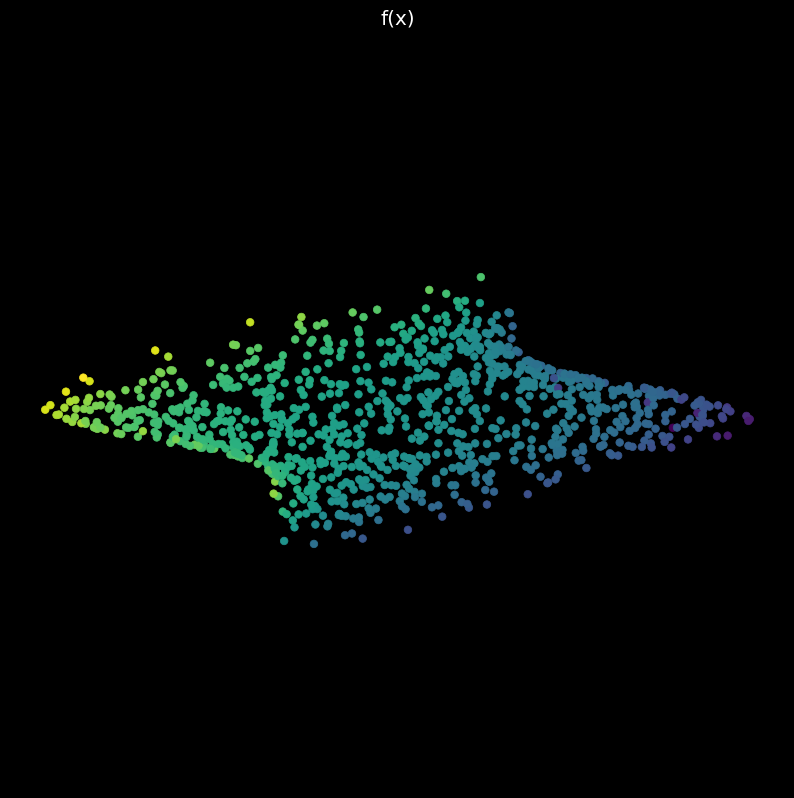

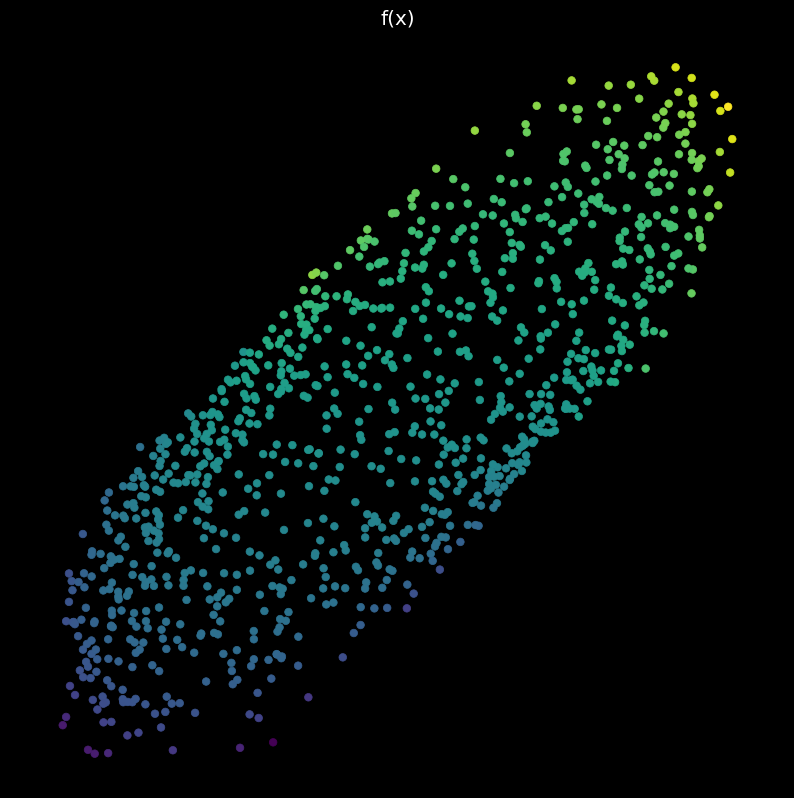

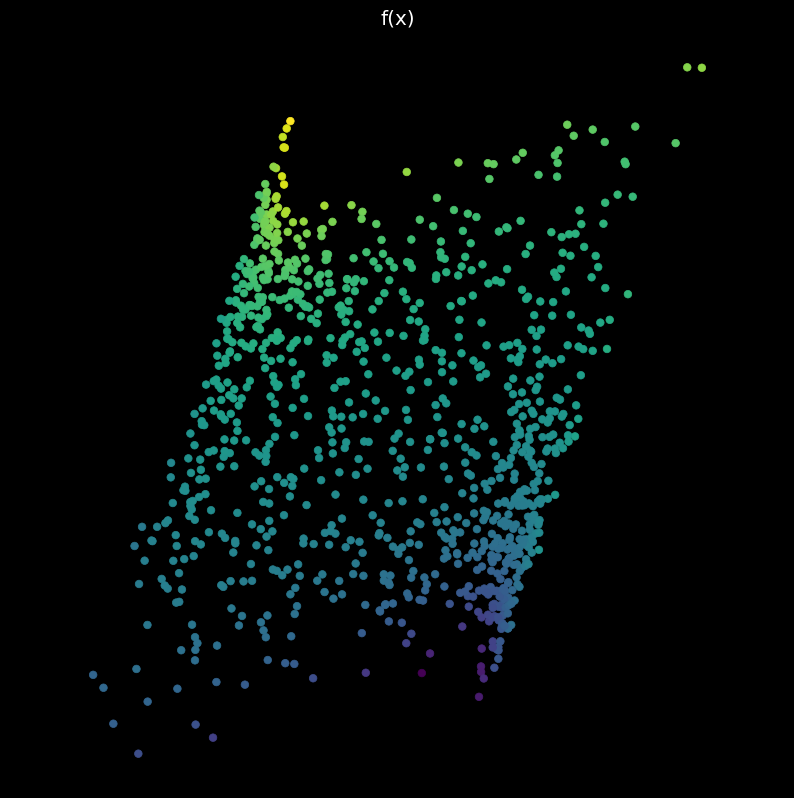

In [35]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)
n_hidden = 5

for i in range(5):
    # create 1-layer neural networks with random weights
    model = tf.keras.Sequential([
        tf.keras.Input(shape = (2,)),
        tf.keras.layers.Dense(n_hidden, use_bias = False),
        tf.keras.layers.Activation(tf.nn.tanh),
        tf.keras.layers.Dense(n_hidden, use_bias = False),
        tf.keras.layers.Activation(tf.nn.tanh),
        tf.keras.layers.Dense(n_hidden, use_bias = False),
        tf.keras.layers.Activation(tf.nn.tanh),
        tf.keras.layers.Dense(units = 2, use_bias = False)
    ])

    Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')
#     plot_bases(OI)